<a href="https://colab.research.google.com/github/Khislatz/DS-Unit-2-Kaggle-Challenge/blob/master/module2-random-forests/Khislat_Zhuraeva_LS_DS_222_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

#Split train into train and val
train, val = train_test_split(train, train_size=0.8, test_size=0.2,
                              stratify=train['status_group'], random_state=42) 
#stratification is used especially for imballanced data sets. first splits the data 
#into the groups according to their target value. So in our case it is going to split 
# the data into 3 groups: functional, functional needs repair and non functional
#then do 80-20% split within each group and then recombine those splits and give us the train and validation 

In [9]:
train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [10]:
train[['longitude','latitude']].describe()

,longitude,latitude
count,47520.000000,4.752000e+04
mean,34.082431,-5.705946e+00
std,6.552053,2.941332e+00
min,0.000000,-1.164944e+01
25%,33.092142,-8.528215e+00
50%,34.910740,-5.021436e+00
75%,37.170578,-3.327185e+00
max,40.344301,-2.000000e-08


In [0]:
def wrangle(X):
  """Wrange train, validate, and test sets in the same way"""

  #Prevent SettingWithCopyWarning
  X =X.copy()

  #About 3% of the time, latitude has small values near zero (max=-2.000000e-08),
  #outside Tanzania, so we'll treat these values like zero
  X['latitude'] = X['latitude'].replace(-2e-08, 0)

  #When columns have zeros and shouldn't, they are like null values. 
  #So we'll replace the zeros with nulls, and impute missing values later. 
  #Also create a "missing indicator" column, because the fact that 
  #values are missing maybe a predictive signal
  cols_with_zeros = ['longitude','latitude', 'construction_year', 
                     'gps_height', 'population']
  for col in cols_with_zeros:
    X[col] = X[col].replace(0, np.nan)
    X[col+'_MISSING'] = X[col].isnull()

   #Drop duplicate columns 
  duplicates =['quantity_group', 'payment_type']
  X = X.drop(columns=duplicates)

   #Drop recorded_by (never varies) and id(always varies, random)
  unusable_variance = ['recorded_by', 'id']
  X=X.drop(columns=unusable_variance)

   #Convert date_recorded to datetime
  X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True) 

   #Extract components from date_recordedd, then drop the original column
  X['year_recorded'] = X['date_recorded'].dt.year                  
  X['month_recorded'] = X['date_recorded'].dt.month
  X['day_recorded'] = X['date_recorded'].dt.day
  X = X.drop(columns='date_recorded')

  #Engineer a feature: how many years from construction_year to date_recorded
  X['years'] = X['year_recorded'] - X['construction_year']
  X['years_MISSING'] = X['years'].isnull()

  #return the wrangled dataframe 
  return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [0]:
#The status_group column is the target 
target = 'status_group'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

#Get a list of numeric features
numeric_features = train.select_dtypes(include='number').columns.tolist()

#Get a series with the cardinality of the nonnumeric features 
cardinality = train_features.select_dtypes(exclude='number').nunique()

#Get a list of all categorical features with cardinality <=50
categorical_features = cardinality[cardinality<=50].index.tolist()

#Combine all the lists
features = numeric_features + categorical_features



In [0]:
#Arrange data into X features matrix and y target vector
X_train = train[features]
y_train= train[target]
X_val= val[features]
y_val= val[target]
X_test = train[features]

In [15]:
%%time

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# pipeline = make_pipeline(
#     ce.one_hot.OneHotEncoder(),
#     SimpleImputer(),
#     RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=42) 
# )
# # n_estimator trains n number (100) decision trees (how many decision trees to train at the same time) and averages their predictions in case of Regressor
# # and in case of Classifier it finds the most, run predictions on 100 decision trees and choose the most common prediction and this will be the class that 
# # RandomForestClassifier gives

# # If n_jobs = 2, then 50 trees will be trained on one core and 50 - on another (since we have n_estimators =100)
# # Since we set n_jobs = -1, it wil just use all the available cores 

# pipeline.fit(X_train, y_train)
# print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')

CPU times: user 74.9 ms, sys: 21.5 ms, total: 96.3 ms
Wall time: 260 ms


In [0]:
# print(f'X_train shape before encoding: {X_train.shape}')
# encoder = pipeline.named_steps['onehotencoder']
# X_train_enc = encoder.transform(X_train)

# print(f'X_train shape after encoding: {X_train_enc.shape}')

In [0]:
import matplotlib.pyplot as plt

# rf = pipeline.named_steps['randomforestclassifier']
# importances = pd.Series(rf.feature_importances_, X_train_enc.columns)
# n=20

# plt.figure(figsize=(10, n/2))
# plt.title(f'Top {n} features')
# importances.sort_values()[-n:].plot.barh(); # top 20 features if we one-hot encode them 

#Ordinal encoding 

In [18]:
#Since previously we dropped all the columns with high cardinality,
#now we are putting them back 

%%time
X_train = train.drop(columns=target) # we restored all the columns but target
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)
)

pipeline.fit(X_train, y_train)
print(f'Validation accuracy {pipeline.score(X_val, y_val)}')

Validation accuracy 0.813047138047138
CPU times: user 37.9 s, sys: 406 ms, total: 38.3 s
Wall time: 20.3 s


In [19]:
print(f'X_train shape before ordinal encoding: {X_train.shape}')

encoder = pipeline.named_steps['ordinalencoder']
X_train_enc = encoder.transform(X_train)
print(f'X_train shape after ordinal encoding: {X_train_enc.shape}')
#the same because ordinal encoding does not increase dimensionality of the data 

X_train shape before ordinal encoding: (47520, 45)
X_train shape after ordinal encoding: (47520, 45)


In [20]:
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train_enc.columns)
importances[-20:] #top 20 important features 

management_group             0.004812
payment                      0.020296
water_quality                0.007465
quality_group                0.008936
quantity                     0.082989
source                       0.013146
source_type                  0.012908
source_class                 0.004446
waterpoint_type              0.035534
waterpoint_type_group        0.025060
longitude_MISSING            0.001287
latitude_MISSING             0.001451
construction_year_MISSING    0.001818
gps_height_MISSING           0.002124
population_MISSING           0.001939
year_recorded                0.004810
month_recorded               0.014889
day_recorded                 0.036576
years                        0.032159
years_MISSING                0.001880
dtype: float64

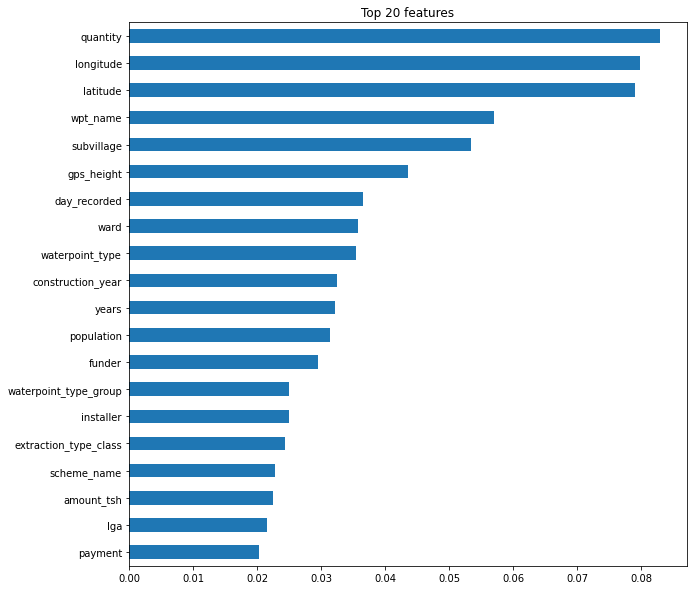

In [21]:
n=20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [22]:
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
test_pred = pipeline.predict(X_test)
test_pred

array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [0]:
submission = pd.DataFrame({'id':test['id'],'status_group':test_pred})
filename = 'Water Pump Predictions 2.csv'
submission.to_csv(filename,index=False)
